In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\juhi\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("titanic2.csv") # reading csv file

In [3]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.ndim # dimension of data is 2

2

In [6]:
df.shape # data has 891 rows and 13 columns

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum() # checking null values in data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [10]:
df["Cabin"].value_counts() 

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C7             1
E68            1
A7             1
D6             1
C50            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
df["Cabin"]=df["Cabin"].fillna("G6")

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#observation - Here we can see that in age column mean age is 26.9 but max is 80 and min is 0 , this shows it has outliers.
# mean of sibling/spouse column is 0.52 and max is 8, it also has outliers.
# mean of parents/children in parch column is 0.3 whereas max is 6, it also has outliers
# mean value for fare is 32.2 where as min value is 0 and max is 512. this shows some tickets were very costly.

# Visualization

# How Many people survived?

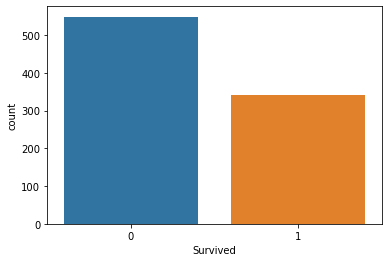

In [15]:
sns.countplot(df["Survived"])
plt.show()
#x,y=df["Survived"].value_counts(),df["Survived"].value_counts()
#print(x,y)

In [16]:
# we can observe that more people died. 0 - shows not survived and 1 - Shows survived.
# we can observe that out of  891 passengers 549 died and 342 survived

# How many passengers are there in each class?

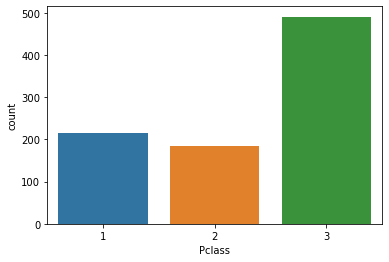

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
sns.countplot(df["Pclass"])
plt.show()
df["Pclass"].value_counts()

In [18]:
# We can Observe that maximum number of Passengers are from 3rd class
# Here we can observe that 1st class had 216 passengers , 2nd class has 184 passengers and 3rd class has 491 passengers

# How many passengers were Male/Female?

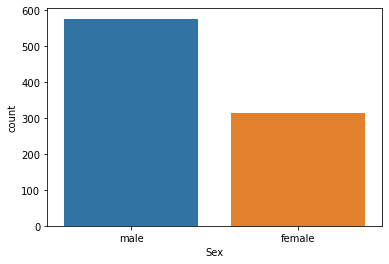

male      577
female    314
Name: Sex, dtype: int64

In [19]:
sns.countplot(df["Sex"])
plt.show()
df["Sex"].value_counts()

In [20]:
# we can observe that more number of passengers are male.
# we can observe that There were 577 males and 314 females

# How Age of passengers is distributed?

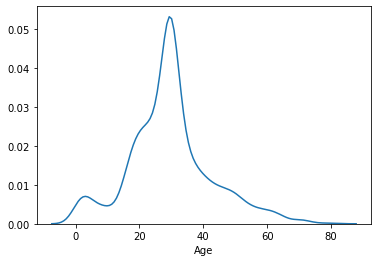

In [21]:
sns.distplot(df["Age"],hist=False)
plt.show()

In [22]:
# more number of passengers are between age of 20-40

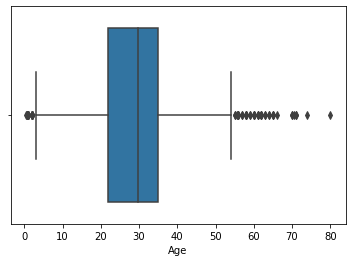

In [23]:
sns.boxplot(df["Age"])
plt.show()

In [24]:
# median age of travellers was around 30
# 25% of the age of people who were travelling was below 20. ie kids
# 75% of the age of the people travelling was above 30 years
# age has oulier values in it.

# Number of Siblings/Spouses Aboard ?

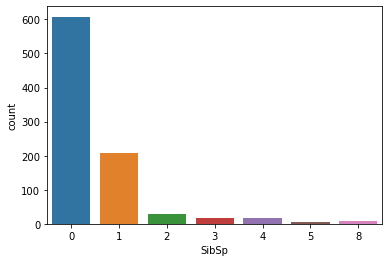

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
sns.countplot(df["SibSp"])
plt.show()
df["SibSp"].value_counts()

In [26]:
# we can observe that max Number of Siblings/Spouses Aboard were 0 followed by 1 .
# we can observe that 608 ie max number of people were siblings/spouses in ship.

# Number of Parents/Children Aboard?

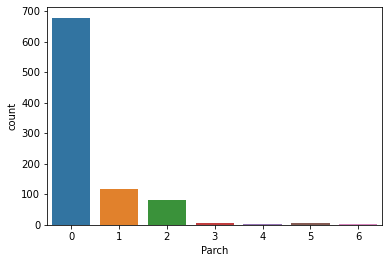

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
sns.countplot(df["Parch"])
plt.show()
df["Parch"].value_counts()

In [28]:
## we can observe that max Number of Parents/Children Aboardwere 0 followed by 1 .
# we can observe that 678 passensgers ie max number of people were parents/Children in ship

# Distribution of Fare ?

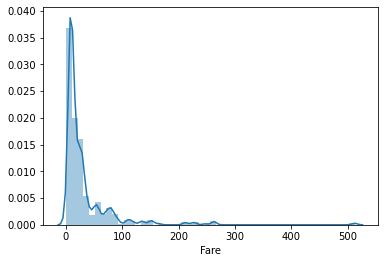

In [29]:
sns.distplot(df["Fare"])
plt.show()

In [30]:
# we can observe that fare of most of the people were between 0 to 100.

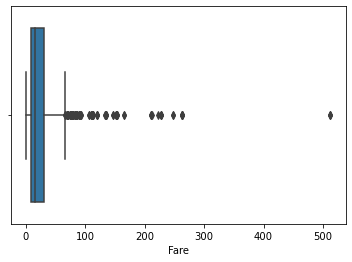

(0.0, 512.3292)

In [31]:
sns.boxplot(df["Fare"])
plt.show()
df["Fare"].median()
x,y=df["Fare"].min(),df["Fare"].max()
x,y

In [32]:
# minimum fare is 0
# maximum fare is around 512
# median fare is around 14.45
# There are outlier values for fare above 100.

# Count of  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

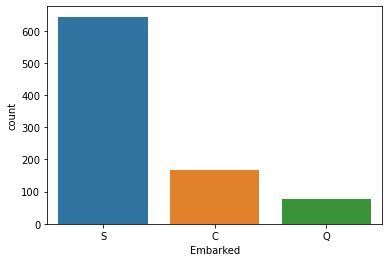

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
sns.countplot(df["Embarked"])
plt.show()
df["Embarked"].value_counts()

In [34]:
# embarked column shows Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
# we can see that maximum number of passengers ie 644 started from port S = Southampton

# In Which class people survived More?

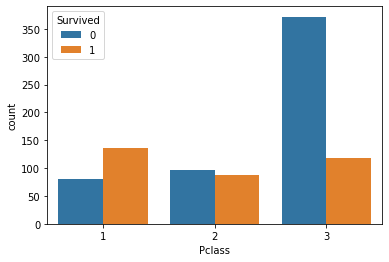

In [35]:
sns.countplot(x="Pclass",data=df,hue="Survived")
plt.show()

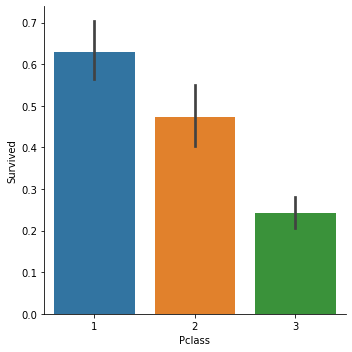

In [36]:
sns.catplot(x="Pclass",data=df,y="Survived",kind="bar")
plt.show()

In [37]:
#Survival rate in class 1 is more

In [38]:
# we can observe that maximum number of people survived from 1st class

# Who Survived more males/Females?

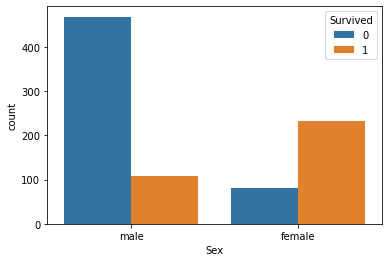

In [39]:
sns.countplot(x="Sex",data=df,hue="Survived")
plt.show()

In [40]:
# We can see that more number of female survived than males

# Which age group survived more?

In [41]:
age_group=[]
for i in df["Age"]:
    if i <10:
        age_group.append("kids")
    elif i>10 and i<=18:
        age_group.append("teens")
    elif i>18 and i<=60:
        age_group.append("adult")
    else:
        age_group.append("old age")

In [42]:
df["age_group"]=age_group
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S,adult


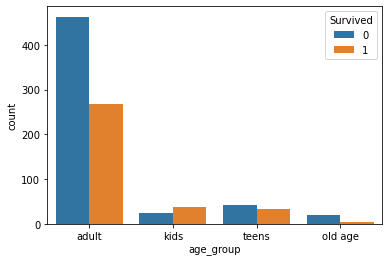

In [43]:
sns.countplot(x="age_group",data=df,hue="Survived")
plt.show()

In [44]:
# we can observe that more than 400 adults survived.

#  Relation of Survival with Number of Siblings/Spouses Aboard?

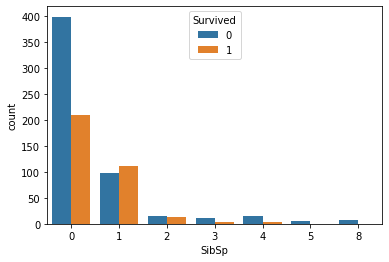

In [45]:
sns.countplot(x="SibSp",data=df,hue="Survived")
plt.show()

In [46]:
# we can observe that passengers that having 0 sibling/spouse are more than 200 who survived.

# Relation of Survival with Number of Parents/Children Aboard?

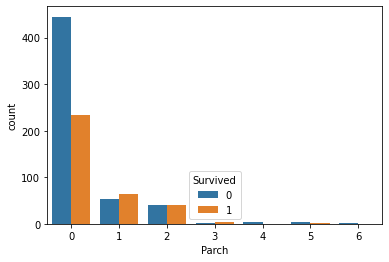

In [47]:
sns.countplot(x="Parch",data=df,hue="Survived")
plt.show()

In [48]:
# we can see that passengers that don't have parents or children survived more with count of around 230.

# From which embarked Passengers Survived more?

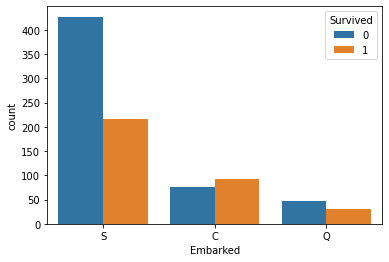

In [49]:
sns.countplot(x="Embarked",data=df,hue="Survived")
plt.show()

In [50]:
# Passengers whose Port of Embarkation is S = Southampton survived more with count of around 70.

# Which passenger class has more fare?

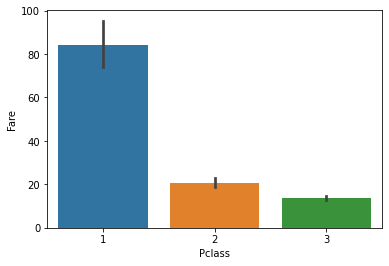

In [51]:
sns.barplot(x="Pclass",y="Fare",data=df)
plt.show()

In [52]:
# first pclass has more fare

# Relation between gender and age groups?

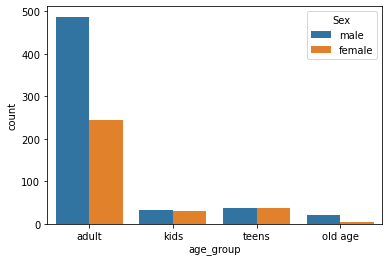

In [53]:
sns.countplot(x="age_group",hue="Sex",data=df)
plt.show()

In [54]:
#adults has  around 500 males and more than 250 females

# How Fare is related to Gender?

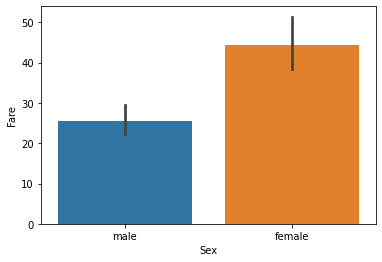

In [55]:
sns.barplot(x="Sex",y="Fare",data=df)
plt.show()

In [56]:
# Fare for Females is more than males 

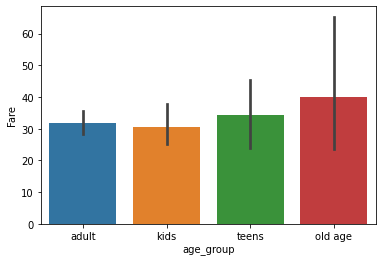

In [57]:
sns.barplot(x="age_group",y="Fare",data=df)
plt.show()

In [58]:
# Fare of Oldage is more as compared to others

# In which class Females survived more?

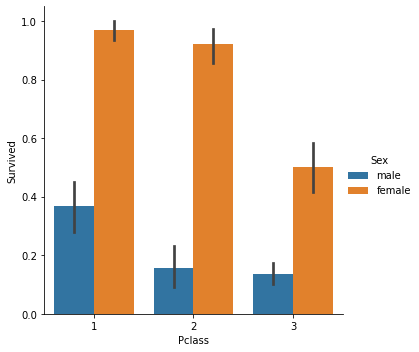

In [59]:
sns.catplot(x="Pclass",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

In [60]:
# we can see that Females survived more from class1. 
# Y axis in catplot shows survival rate according to class and gender.

# In which Embarked Females survived more?

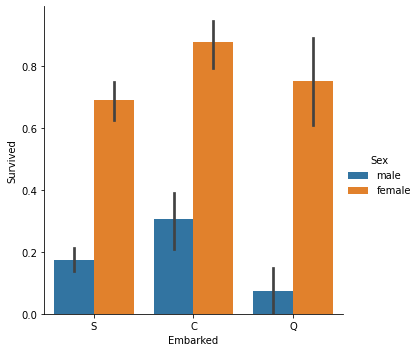

In [61]:
sns.catplot(x="Embarked",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

In [62]:
# In C = Cherbourg ,Females survived more.

# In which age group males has more fare?

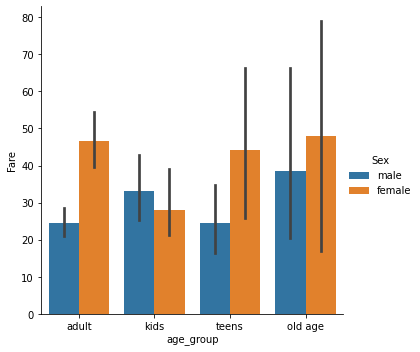

In [63]:
sns.catplot(x="age_group",y="Fare",hue="Sex",data=df,kind="bar")
plt.show()

In [64]:
# In Kids Males had to pay more. 
# In Old age Females has to pay more

# Multivariate Analysis

In [65]:
corr_matrix=df.corr()

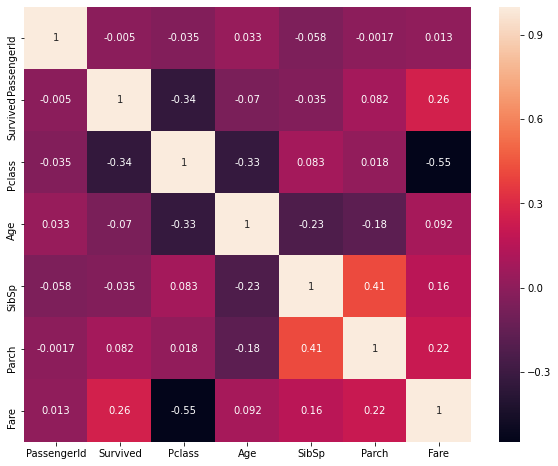

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [67]:
# here we can see that  survived and fare are strongly related - corelation is 0.26
# parch and sipsb are strongly related wit corealtion of 0.41
# parch and fare are positively related 
# sibsp and fare are positvely related .

# Label Encoding 

In [68]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,S,adult


In [70]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)

In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_group
0,0,3,1,22.0,1,0,7.2500,G6,S,adult
1,1,1,0,38.0,1,0,71.2833,C85,C,adult
2,1,3,0,26.0,0,0,7.9250,G6,S,adult
3,1,1,0,35.0,1,0,53.1000,C123,S,adult
4,0,3,1,35.0,0,0,8.0500,G6,S,adult


In [72]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
df["Age"].round(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [74]:
df["Embarked"].replace({"S":"1","Q":"2","C":"3"},inplace=True)

# Statistical Test

In [75]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_group
0,0,3,1,22.0,1,0,7.2500,G6,1,adult
1,1,1,0,38.0,1,0,71.2833,C85,3,adult
2,1,3,0,26.0,0,0,7.9250,G6,1,adult
3,1,1,0,35.0,1,0,53.1000,C123,1,adult
4,0,3,1,35.0,0,0,8.0500,G6,1,adult


# Test on survived and Fare - T test independent 

In [76]:
from scipy.stats import ttest_ind
a=df[df["Survived"]==0]["Fare"]
b=df[df["Survived"]==1]["Fare"]
ttest_ind(a, b)

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

In [77]:
# H0: mean of Fare of Survived people = Mean of Fare of died people
#HA: sample means are different.
#α = 0.05
# Here P value is less than alpha ie 0.05 and p value is 0.000000000000000612 , so we will accept the null hypothsis
# Fare is dependent on survival.

# Test on Survival and pclass - chi square test

In [78]:
from scipy.stats import f_oneway,ttest_ind,ttest_rel,chi2_contingency

In [79]:
a=pd.crosstab(df["Survived"],df["Pclass"])
a

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [80]:
chi,p,dof,exp=chi2_contingency(a)

In [81]:
print("The p-value is ",p)

The p-value is  4.549251711298793e-23


In [82]:
# H0:Survival and Pclass are independent
# H1:Survival and pclass are dependent.
# p value is less than 0.05 , so we will accept null hypothesis.
# survival is not dependent on pclass

# survived and Gender - Chisquare

In [83]:
a=pd.crosstab(df["Survived"],df["Sex"])

In [84]:
chi,p,dof,exp=chi2_contingency(a)
print("The p-value is ",p)

The p-value is  1.1973570627755645e-58


In [85]:
# H0: Survival and gender are independent
# H1: Survival and gender are dependent
# p value is less than 0.05 (aplha) , so we will accept null hypothesis.
# survival is not dependent on gender

# Survived and age - T Test Independent 

In [86]:
# H0:Mean of both samples are equal
# H1: Mean of both sample are not equal

In [87]:
from scipy.stats import f_oneway,ttest_ind,ttest_rel,chi2
a=df[df["Survived"]==0]["Age"]
b=df[df["Survived"]==1]["Age"]
f_oneway(a,b)

F_onewayResult(statistic=4.353516089078488, pvalue=0.03721708372683364)

In [88]:
# p value is 0.3 which is less than 0.5 , so we will accept H0
# Survival and Age are related.

# Survived and SibSp - Chi square test

In [89]:
# Ho:Survival and sibling-spouse aborad are independent
# H1:Survival and sibling-spouse aborad are dependent

In [90]:
a=pd.crosstab(df["Survived"],df["SibSp"])
chi,p,dof,exp=chi2_contingency(a)
print("The p-value is ",p)

The p-value is  1.5585810465902116e-06


In [91]:
# p value is less than 0.05, we will accept null hypothesis
# suvived and sibling-spouse aborad are independent

# Survived and Parch - chi square test

In [92]:
# Ho:Survival and parents-children aborad are independent
# H1:Survival and parents-children aborad are dependent

In [93]:
a=pd.crosstab(df["Survived"],df["Parch"])
chi,p,dof,exp=chi2_contingency(a)
print("The p-value is ",p)

The p-value is  9.703526421039997e-05


In [94]:
# p value is less than 0.05, we will accept null hypothesis
# suvived and Parents-spouse aborad are independent

# Survived and Embarked - anova

In [95]:
# Ho:mean of 3 samples are equal
# H1:mean of 3 samples is not equal

In [96]:
a=df[df["Embarked"]=="1"]["Survived"]
b=df[df["Embarked"]=="2"]["Survived"]
c=df[df["Embarked"]=="3"]["Survived"]

In [97]:
f_oneway(a,b,c)

F_onewayResult(statistic=13.60527044569358, pvalue=1.514339014290716e-06)

In [98]:
# p value is less than 0.05 , we will accept null hypothesis
# survived and embaarked are independent.

# Survived and age group - anova

In [99]:
df["age_group"].unique()

array(['adult', 'kids', 'teens', 'old age'], dtype=object)

In [100]:
df["age_group"].replace({"kids":"1","teens":"2","adult":"3","old age":"4"},inplace=True)

In [101]:
# Ho:mean of 4 samples are equal
# H1:mean of 4 samples is not equal

In [107]:
a=pd.crosstab(df["age_group"],df["Survived"])
chi,p,dof,exp=(chi2_contingency(a))
print("The p-value is ",p)

The p-value is  0.00035146937075379364


In [108]:
# p value is less than 0.05,we will accept null hypotheis
# age group and survival are independent